In [6]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = [
        '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_05_29_True_singleCells_diaPASEF_Synchro/20230526_TIMS05_MCT_SA_HeLa_SynchroTest_singleCell_SM03_p11_BC2_SyP4_26_S3-G10_1_2691.d',
    ]

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_05_19_SyP5_single_cells'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')

In [7]:
from alphadia.extraction import data

In [8]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments_mbr.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

0:00:00.000225  PROGRESS:       _   _      _         ___ ___   _   
0:00:00.000816  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:00.001199  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:00.001636  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:00.002008  PROGRESS:            |_|                            
0:00:00.002449  PROGRESS: 
0:00:00.002974  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default_new.yaml
0:00:00.009677  INFO: Applying config update from dict
0:00:00.010075  PROGRESS: version: 1.1.0
0:00:00.010365  PROGRESS: hostname: PCMANN428.biochem.mpg.de
0:00:00.010692  PROGRESS: date: 2023-07-18 11:30:00
0:00:02.567197  INFO: renaming precursor_columns columns
0:00:02.568235  INFO: renaming fragment_columns columns
0:00:02.568759  INFO: ========= Library Stats =========
0:00:02.569069  INFO: Number of precursors: 220,333
0:00:02.596303  INFO: 	thereof targets:176,268
0:00:0

7826


100%|██████████| 13894/13894 [00:05<00:00, 2444.11it/s]
0:05:12.698608  WARNING: base_width_mobility has 15 NaNs ( 0.11 % out of 13894)
0:05:12.699254  WARNING: base_width_rt has 15 NaNs ( 0.11 % out of 13894)
0:05:12.699834  WARNING: rt_observed has 15 NaNs ( 0.11 % out of 13894)
0:05:12.700496  WARNING: mobility_observed has 15 NaNs ( 0.11 % out of 13894)
0:05:12.701016  WARNING: mono_ms1_intensity has 15 NaNs ( 0.11 % out of 13894)
0:05:12.701663  WARNING: top_ms1_intensity has 15 NaNs ( 0.11 % out of 13894)
0:05:12.702205  WARNING: sum_ms1_intensity has 15 NaNs ( 0.11 % out of 13894)
0:05:12.702830  WARNING: weighted_ms1_intensity has 15 NaNs ( 0.11 % out of 13894)
0:05:12.703654  WARNING: weighted_mass_deviation has 15 NaNs ( 0.11 % out of 13894)
0:05:12.704223  WARNING: weighted_mass_error has 15 NaNs ( 0.11 % out of 13894)
0:05:12.704855  WARNING: mz_library has 15 NaNs ( 0.11 % out of 13894)
0:05:12.705452  WARNING: mz_observed has 15 NaNs ( 0.11 % out of 13894)
0:05:12.706237 

(13878, 37)
(13878,)


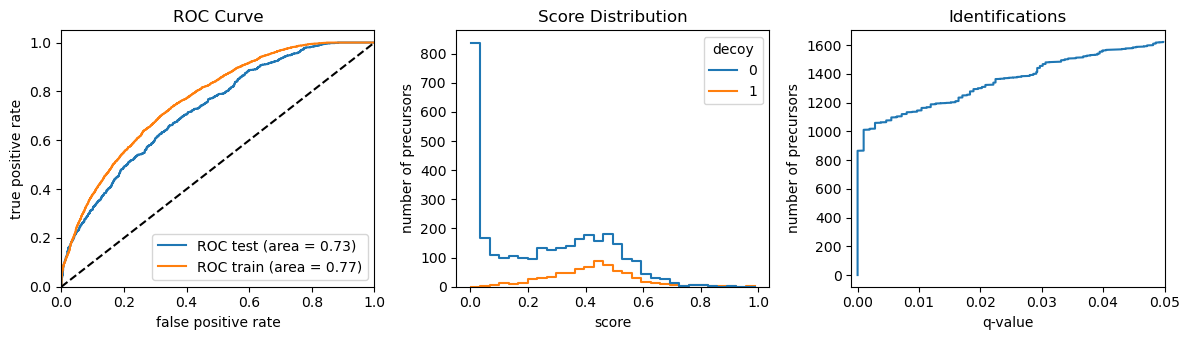

0:05:14.894174  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:05:14.894576  PROGRESS: Accumulated precursors: 3,902, 0.01 FDR: 1,146, 0.001 FDR: 1,012
0:05:14.895658  INFO: calibration group: precursor, fitting mz estimator 


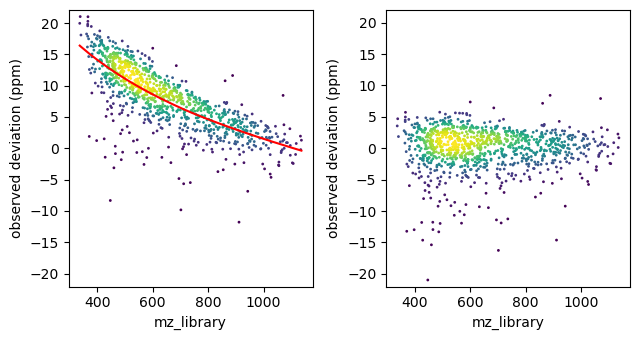

0:05:14.999095  INFO: calibration group: precursor, fitting rt estimator 


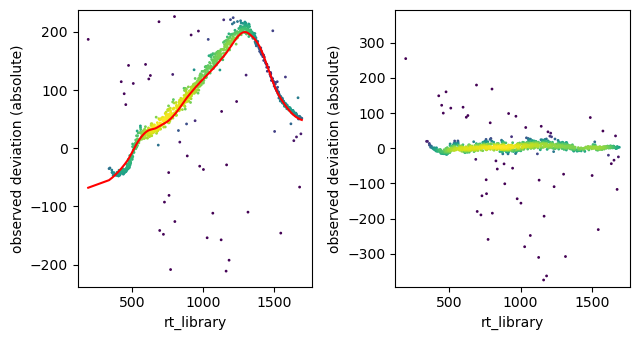

0:05:15.091461  INFO: calibration group: precursor, fitting mobility estimator 


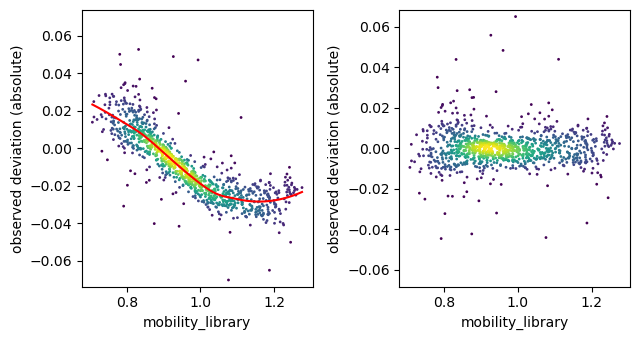

0:05:15.196759  INFO: calibration group: fragment, fitting mz estimator 


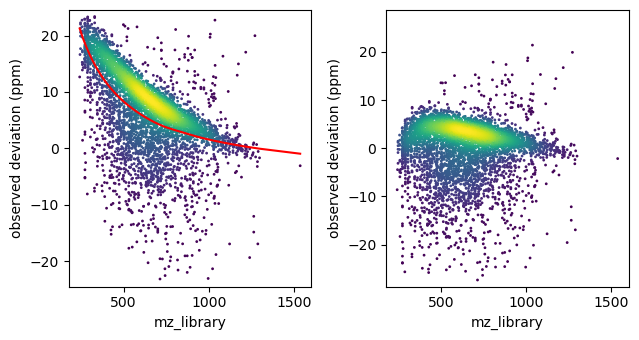

0:05:15.533830  INFO: calibration group: precursor, predicting mz
0:05:15.544063  INFO: calibration group: precursor, predicting rt
0:05:15.569361  INFO: calibration group: precursor, predicting mobility
0:05:15.581425  INFO: calibration group: fragment, predicting mz
0:05:15.868938  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:05:15.871977  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 36.069493741768746, Mobility error: 0.04
0:05:15.873930  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:05:15.874335  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:15.874649  INFO: FWHM in RT is 4.12 seconds, sigma is 1.52
0:05:15.875183  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.06


7810


100%|██████████| 12953/12953 [00:03<00:00, 3745.94it/s]
0:05:30.404741  WARNING: base_width_mobility has 49 NaNs ( 0.38 % out of 12953)
0:05:30.405444  WARNING: base_width_rt has 49 NaNs ( 0.38 % out of 12953)
0:05:30.406047  WARNING: rt_observed has 49 NaNs ( 0.38 % out of 12953)
0:05:30.406842  WARNING: mobility_observed has 49 NaNs ( 0.38 % out of 12953)
0:05:30.407566  WARNING: mono_ms1_intensity has 49 NaNs ( 0.38 % out of 12953)
0:05:30.408307  WARNING: top_ms1_intensity has 49 NaNs ( 0.38 % out of 12953)
0:05:30.408926  WARNING: sum_ms1_intensity has 49 NaNs ( 0.38 % out of 12953)
0:05:30.409483  WARNING: weighted_ms1_intensity has 49 NaNs ( 0.38 % out of 12953)
0:05:30.410160  WARNING: weighted_mass_deviation has 49 NaNs ( 0.38 % out of 12953)
0:05:30.411156  WARNING: weighted_mass_error has 49 NaNs ( 0.38 % out of 12953)
0:05:30.411603  WARNING: mz_library has 49 NaNs ( 0.38 % out of 12953)
0:05:30.412243  WARNING: mz_observed has 49 NaNs ( 0.38 % out of 12953)
0:05:30.412958 

(12901, 37)
(12901,)


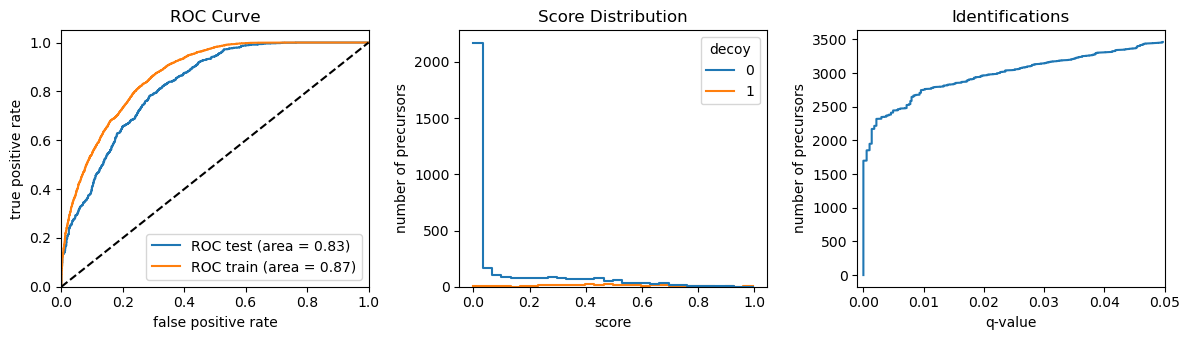

0:05:33.681892  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:33.682296  PROGRESS: Accumulated precursors: 3,893, 0.01 FDR: 2,753, 0.001 FDR: 1,853
0:05:33.683974  INFO: calibration group: precursor, fitting mz estimator 


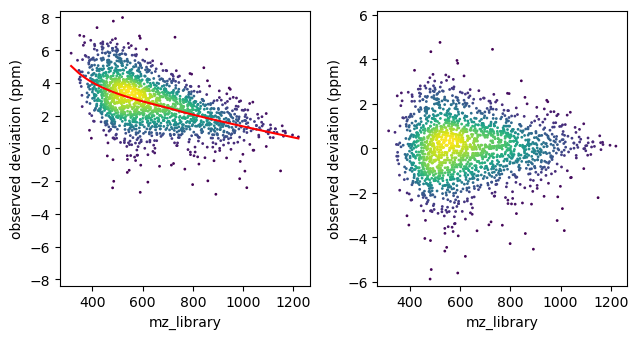

0:05:34.117798  INFO: calibration group: precursor, fitting rt estimator 


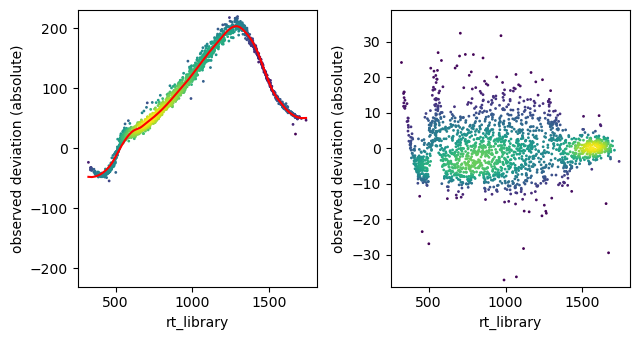

0:05:34.251067  INFO: calibration group: precursor, fitting mobility estimator 


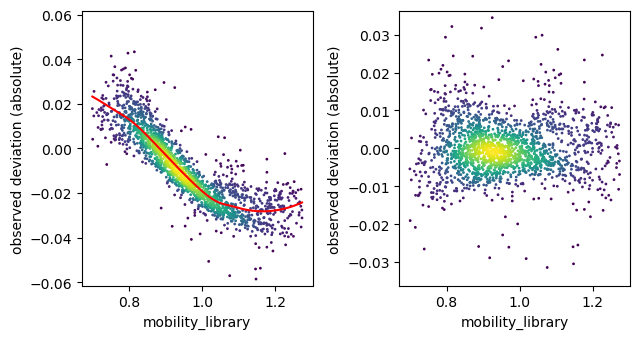

0:05:34.395629  INFO: calibration group: fragment, fitting mz estimator 


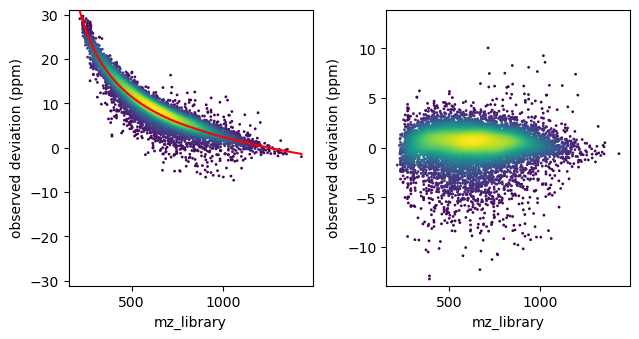

0:05:35.160078  INFO: calibration group: precursor, predicting mz
0:05:35.170191  INFO: calibration group: precursor, predicting rt
0:05:35.195429  INFO: calibration group: precursor, predicting mobility
0:05:35.205847  INFO: calibration group: fragment, predicting mz
0:05:35.508967  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:05:35.511985  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:05:35.513929  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:05:35.514395  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:35.514768  INFO: FWHM in RT is 3.80 seconds, sigma is 1.41
0:05:35.515081  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.86


7822


100%|██████████| 12585/12585 [00:03<00:00, 3871.93it/s]
0:05:48.719430  WARNING: base_width_mobility has 37 NaNs ( 0.29 % out of 12585)
0:05:48.720274  WARNING: base_width_rt has 37 NaNs ( 0.29 % out of 12585)
0:05:48.721038  WARNING: rt_observed has 37 NaNs ( 0.29 % out of 12585)
0:05:48.721833  WARNING: mobility_observed has 37 NaNs ( 0.29 % out of 12585)
0:05:48.722583  WARNING: mono_ms1_intensity has 37 NaNs ( 0.29 % out of 12585)
0:05:48.723264  WARNING: top_ms1_intensity has 37 NaNs ( 0.29 % out of 12585)
0:05:48.724133  WARNING: sum_ms1_intensity has 37 NaNs ( 0.29 % out of 12585)
0:05:48.724963  WARNING: weighted_ms1_intensity has 37 NaNs ( 0.29 % out of 12585)
0:05:48.725614  WARNING: weighted_mass_deviation has 37 NaNs ( 0.29 % out of 12585)
0:05:48.726302  WARNING: weighted_mass_error has 37 NaNs ( 0.29 % out of 12585)
0:05:48.727104  WARNING: mz_library has 37 NaNs ( 0.29 % out of 12585)
0:05:48.728022  WARNING: mz_observed has 37 NaNs ( 0.29 % out of 12585)
0:05:48.728688 

(12546, 37)
(12546,)


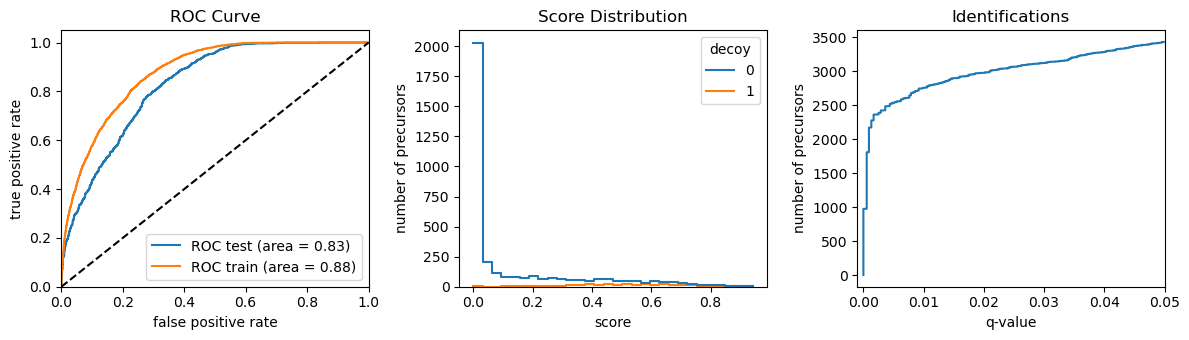

0:05:51.153455  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:05:51.153963  PROGRESS: Accumulated precursors: 3,898, 0.01 FDR: 2,757, 0.001 FDR: 2,171
0:05:51.155397  INFO: calibration group: precursor, fitting mz estimator 


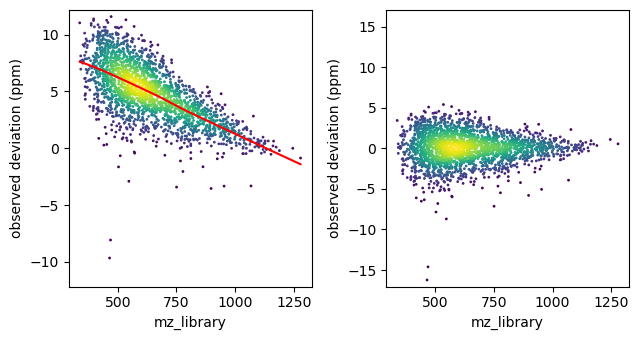

0:05:51.292617  INFO: calibration group: precursor, fitting rt estimator 


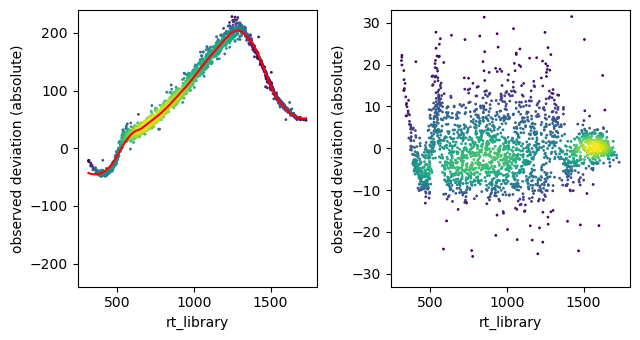

0:05:51.431486  INFO: calibration group: precursor, fitting mobility estimator 


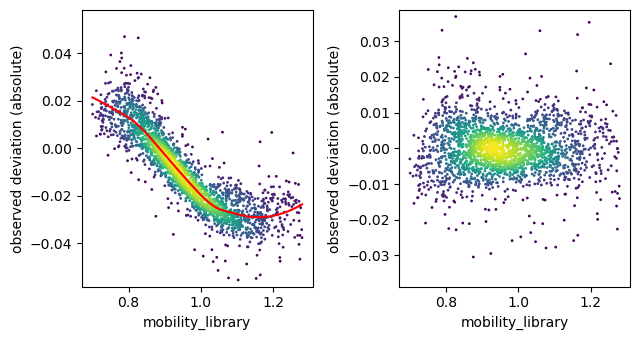

0:05:51.583251  INFO: calibration group: fragment, fitting mz estimator 


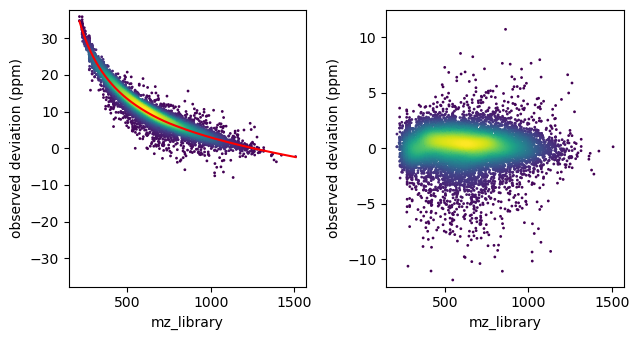

0:05:52.517648  INFO: calibration group: precursor, predicting mz
0:05:52.528096  INFO: calibration group: precursor, predicting rt
0:05:52.557238  INFO: calibration group: precursor, predicting mobility
0:05:52.567151  INFO: calibration group: fragment, predicting mz
0:05:52.861607  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:05:52.864752  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:05:52.866911  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:05:52.867404  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:52.867824  INFO: FWHM in RT is 3.69 seconds, sigma is 1.36
0:05:52.868433  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.79


7808


100%|██████████| 12567/12567 [00:03<00:00, 3738.92it/s]
0:06:05.959940  WARNING: base_width_mobility has 37 NaNs ( 0.29 % out of 12567)
0:06:05.960785  WARNING: base_width_rt has 37 NaNs ( 0.29 % out of 12567)
0:06:05.961393  WARNING: rt_observed has 37 NaNs ( 0.29 % out of 12567)
0:06:05.961831  WARNING: mobility_observed has 37 NaNs ( 0.29 % out of 12567)
0:06:05.962240  WARNING: mono_ms1_intensity has 37 NaNs ( 0.29 % out of 12567)
0:06:05.963043  WARNING: top_ms1_intensity has 37 NaNs ( 0.29 % out of 12567)
0:06:05.963731  WARNING: sum_ms1_intensity has 37 NaNs ( 0.29 % out of 12567)
0:06:05.964505  WARNING: weighted_ms1_intensity has 37 NaNs ( 0.29 % out of 12567)
0:06:05.965063  WARNING: weighted_mass_deviation has 37 NaNs ( 0.29 % out of 12567)
0:06:05.965622  WARNING: weighted_mass_error has 37 NaNs ( 0.29 % out of 12567)
0:06:05.966142  WARNING: mz_library has 37 NaNs ( 0.29 % out of 12567)
0:06:05.966846  WARNING: mz_observed has 37 NaNs ( 0.29 % out of 12567)
0:06:05.967353 

(12529, 37)
(12529,)


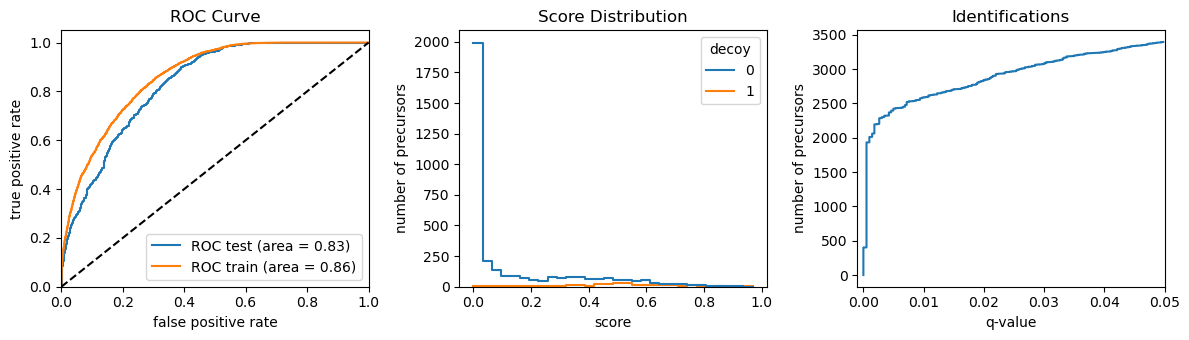

0:06:08.326726  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:06:08.327235  PROGRESS: Accumulated precursors: 3,889, 0.01 FDR: 2,586, 0.001 FDR: 2,011
0:06:08.328895  INFO: calibration group: precursor, fitting mz estimator 


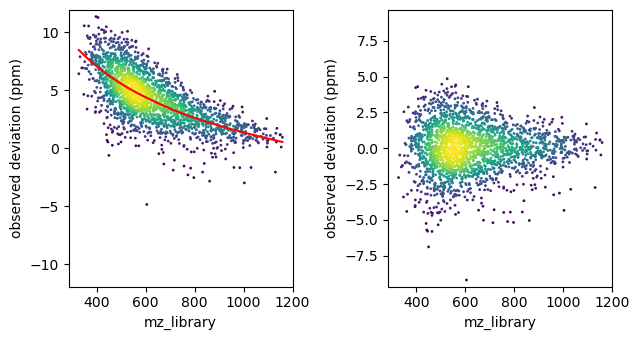

0:06:08.464888  INFO: calibration group: precursor, fitting rt estimator 


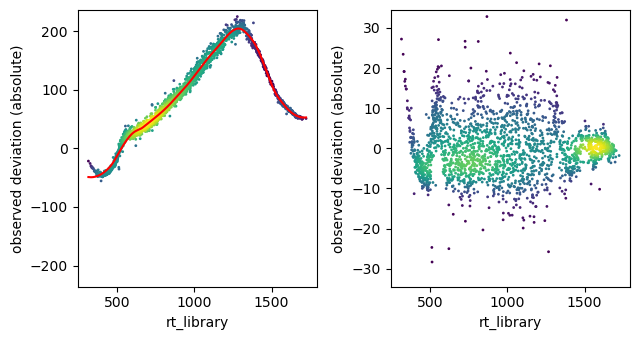

0:06:08.599110  INFO: calibration group: precursor, fitting mobility estimator 


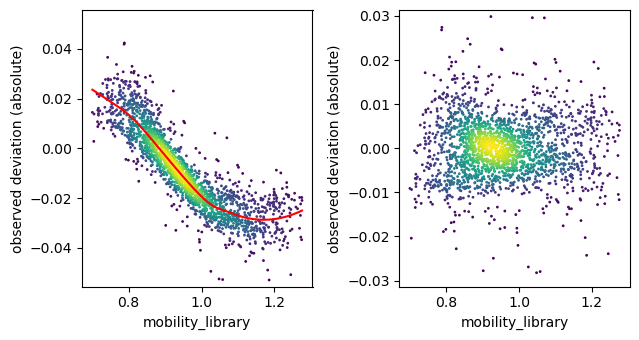

0:06:08.741010  INFO: calibration group: fragment, fitting mz estimator 


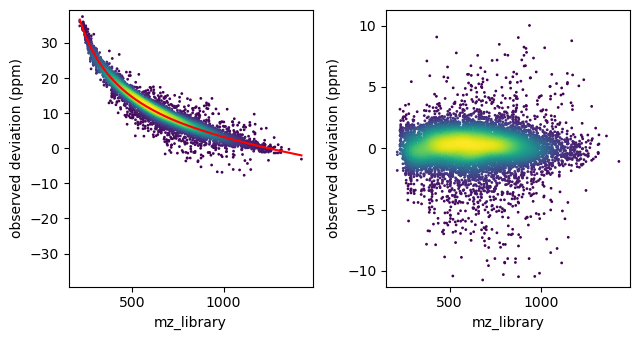

0:06:09.566535  INFO: calibration group: precursor, predicting mz
0:06:09.577040  INFO: calibration group: precursor, predicting rt
0:06:09.602304  INFO: calibration group: precursor, predicting mobility
0:06:09.613248  INFO: calibration group: fragment, predicting mz
0:06:09.923520  PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 4000 ===
0:06:09.926732  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:06:09.928773  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:09.929185  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:09.929624  INFO: FWHM in RT is 3.83 seconds, sigma is 1.42
0:06:09.930061  INFO: FWHM in mobility is 0.008 1/K_0, sigma is 4.97


7838


100%|██████████| 12712/12712 [00:03<00:00, 3683.18it/s]
0:06:23.907402  WARNING: base_width_mobility has 32 NaNs ( 0.25 % out of 12712)
0:06:23.908062  WARNING: base_width_rt has 32 NaNs ( 0.25 % out of 12712)
0:06:23.909001  WARNING: rt_observed has 32 NaNs ( 0.25 % out of 12712)
0:06:23.909423  WARNING: mobility_observed has 32 NaNs ( 0.25 % out of 12712)
0:06:23.909894  WARNING: mono_ms1_intensity has 32 NaNs ( 0.25 % out of 12712)
0:06:23.910582  WARNING: top_ms1_intensity has 32 NaNs ( 0.25 % out of 12712)
0:06:23.911081  WARNING: sum_ms1_intensity has 32 NaNs ( 0.25 % out of 12712)
0:06:23.911628  WARNING: weighted_ms1_intensity has 32 NaNs ( 0.25 % out of 12712)
0:06:23.912086  WARNING: weighted_mass_deviation has 32 NaNs ( 0.25 % out of 12712)
0:06:23.912651  WARNING: weighted_mass_error has 32 NaNs ( 0.25 % out of 12712)
0:06:23.913382  WARNING: mz_library has 32 NaNs ( 0.25 % out of 12712)
0:06:23.913985  WARNING: mz_observed has 32 NaNs ( 0.25 % out of 12712)
0:06:23.914486 

(12680, 37)
(12680,)


/Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/scoring.py:137: RuntimeWarning: divide by zero encountered in divide
  fdr_values = decoy_cumsum/target_cumsum


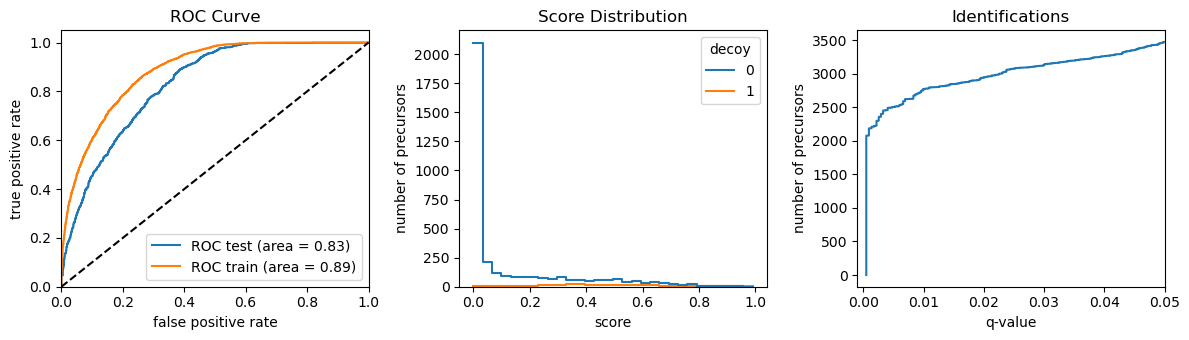

0:06:26.478933  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:06:26.479331  PROGRESS: Accumulated precursors: 3,910, 0.01 FDR: 2,768, 0.001 FDR: 2,186
0:06:26.481001  INFO: calibration group: precursor, fitting mz estimator 


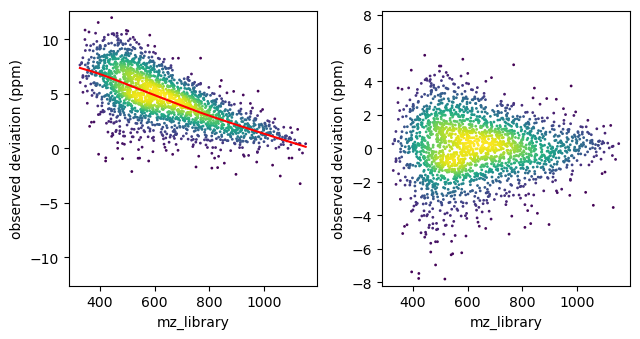

0:06:26.627069  INFO: calibration group: precursor, fitting rt estimator 


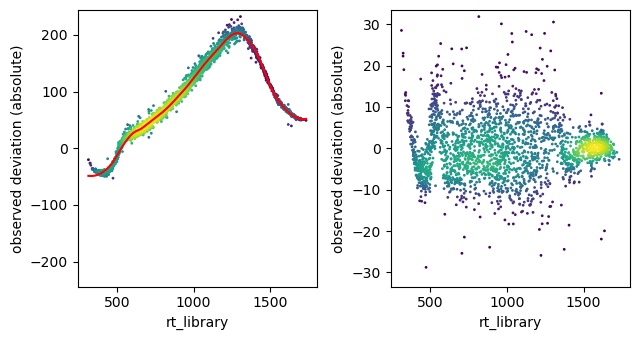

0:06:26.770489  INFO: calibration group: precursor, fitting mobility estimator 


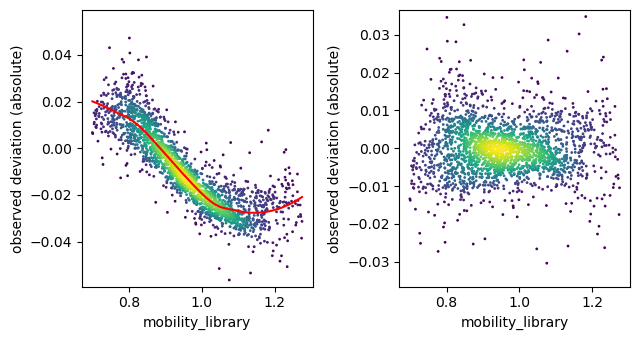

0:06:26.930654  INFO: calibration group: fragment, fitting mz estimator 


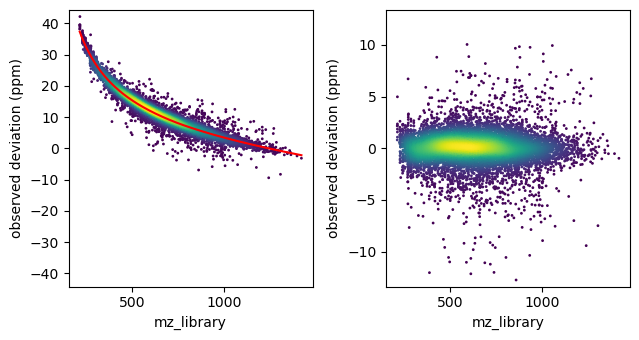

0:06:27.899481  INFO: calibration group: precursor, predicting mz
0:06:27.911494  INFO: calibration group: precursor, predicting rt
0:06:27.936824  INFO: calibration group: precursor, predicting mobility
0:06:27.947837  INFO: calibration group: fragment, predicting mz
0:06:28.251080  INFO: calibration group: precursor, predicting mz
0:06:28.260593  INFO: calibration group: precursor, predicting rt
0:06:28.287698  INFO: calibration group: precursor, predicting mobility
0:06:28.298397  INFO: calibration group: fragment, predicting mz
0:06:28.592012  INFO: calibration group: precursor, predicting mz
0:06:28.601374  INFO: calibration group: precursor, predicting rt
0:06:28.623814  INFO: calibration group: precursor, predicting mobility
0:06:28.634574  INFO: calibration group: fragment, predicting mz
0:06:28.920920  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:06:28.935524  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:28.936040  INFO: D

88132


100%|██████████| 296608/296608 [01:18<00:00, 3762.97it/s]
0:09:41.073898  WARNING: base_width_mobility has 879 NaNs ( 0.30 % out of 296608)
0:09:41.075239  WARNING: base_width_rt has 879 NaNs ( 0.30 % out of 296608)
0:09:41.076286  WARNING: rt_observed has 879 NaNs ( 0.30 % out of 296608)
0:09:41.077222  WARNING: mobility_observed has 879 NaNs ( 0.30 % out of 296608)
0:09:41.078221  WARNING: mono_ms1_intensity has 879 NaNs ( 0.30 % out of 296608)
0:09:41.079173  WARNING: top_ms1_intensity has 879 NaNs ( 0.30 % out of 296608)
0:09:41.080109  WARNING: sum_ms1_intensity has 879 NaNs ( 0.30 % out of 296608)
0:09:41.081141  WARNING: weighted_ms1_intensity has 879 NaNs ( 0.30 % out of 296608)
0:09:41.082287  WARNING: weighted_mass_deviation has 879 NaNs ( 0.30 % out of 296608)
0:09:41.083300  WARNING: weighted_mass_error has 879 NaNs ( 0.30 % out of 296608)
0:09:41.084212  WARNING: mz_library has 879 NaNs ( 0.30 % out of 296608)
0:09:41.085366  WARNING: mz_observed has 879 NaNs ( 0.30 % out 

(295544, 37)
(295544,)


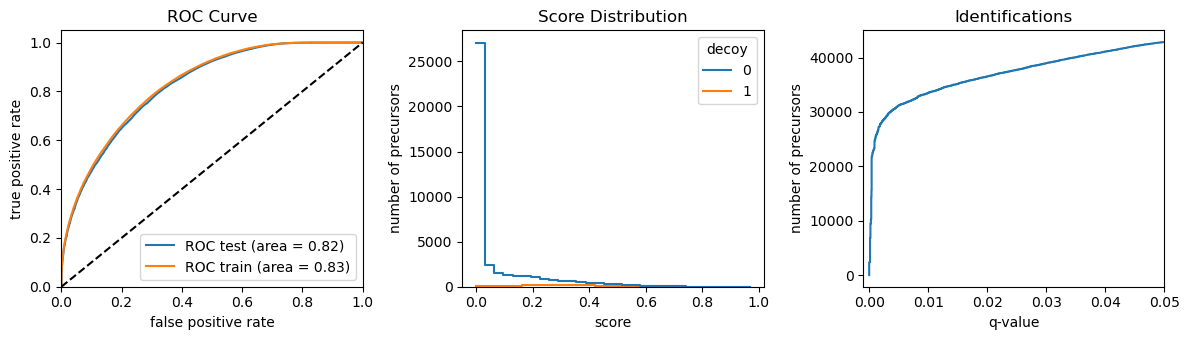

0:10:39.894124  PROGRESS: === extraction finished, 0.05 FDR: 40,838, 0.01 FDR: 33,179, 0.001 FDR: 24,903 ===


In [9]:
import time
plan = Plan(output_location, raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 30,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )

plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    break

start_time = time.time()

reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

workflow = Workflow(
    plan.config, 
    dia_data, 
    reference_flat, 
    fragments_flat
)

workflow.calibration()
d0_df = workflow.extraction()

In [19]:
workflow.calibration_manager.estimator_groups

[{'name': 'fragment', 'estimators': [<Calibration mz, is_fitted: True>]},
 {'name': 'precursor',
  'estimators': [<Calibration mz, is_fitted: True>,
   <Calibration rt, is_fitted: True>,
   <Calibration mobility, is_fitted: True>]}]

In [20]:
d0_df

base_width_mobility  base_width_rt  rt_observed  mobility_observed  \
292008             0.024569       8.506089   709.785950           1.014871   
25888              0.027155       8.506133  1393.107910           0.960560   
83483              0.020690       9.654427   640.876038           0.938578   
29907              0.032328      12.525565   569.102112           1.165517   
291362             0.023276       7.357594   745.384705           1.050431   
...                     ...            ...          ...                ...   
107769             0.033621       6.210097   865.971008           1.032974   
31671              0.007112       3.912324  1030.200195           1.172629   
53686              0.007112       3.912188   848.169739           1.047845   
230979             0.011638      10.801753  1464.314697           1.091164   
26206              0.020690       5.634938  1124.372192           1.255388   

        mono_ms1_intensity  top_ms1_intensity  sum_ms1_intensity  \
292008             85131.0           119988.0           307754.0   
25888             126933.0           139897.0           364313.0   
83483             116981.0           143302.0           369798.0   
29907             114975.0           240706.0           578442.0   
291362             92938.0           119998.0           301398.0   
...                    ...                ...                ...   
107769              5611.0             5611.0            13797.0   
31671                298.0              298.0              571.0   
53686               6656.0             6656.0             8305.0   
230979              2577.0             7112.0            13295.0   
26206               2431.0             2231.0             6417.0   

        weighted_ms1_intensity  weighted_mass_deviation  weighted_mass_error  \
292008            78182.828125                 2.136897             2.136897   
25888            106594.546875                 4.469881             4.469881   
83483             99672.093750                 3.922246             3.922246   
29907            128788.476562                 1.625454             1.625454   
291362            83503.312500                 2.891243             2.891243   
...                        ...                      ...                  ...   
107769             4197.093262                 1.905849             1.905849   
31671               159.232056                 1.448344             1.448344   
53686              3193.996338                 1.715853             1.715853   
230979             3763.047363                -2.606108             2.606108   
26206              1922.190186                 0.700459             0.700459   

        ...       i_3  decoy   rt_library       i_1       i_2  \
292008  ...  0.145620      0   671.142273  0.298231  0.245405   
25888   ...  0.097497      0  1200.127808  0.343745  0.217353   
83483   ...  0.124148      0   607.513428  0.316542  0.232173   
29907   ...  0.185855      0   556.723022  0.241547  0.251350   
291362  ...  0.115992      0   691.678589  0.325846  0.228653   
...     ...       ...    ...          ...       ...       ...   
107769  ...  0.079374      0   781.013184  0.301054  0.181366   
31671   ...  0.071250      0   904.969788  0.350304  0.186456   
53686   ...  0.047740      0   767.072754  0.348487  0.152496   
230979  ...  0.126523      0  1257.537476  0.322848  0.240489   
26206   ...  0.085592      0   993.201477  0.348373  0.204555   

        flat_frag_start_idx       i_5  mobility_library         proba  \
292008               554354  0.027367          1.043548  1.228347e-07   
25888                 49520  0.010238          0.969294  2.638386e-07   
83483                157984  0.019245          0.955679  2.860539e-07   
29907                 57105  0.053047          1.212210  3.277695e-07   
291362               553039  0.016155          1.077095  4.056076e-07   
...                     ...       ...               ...           ...   
1

In [115]:
workflow.config['multiplexing'] = {'multiplexed_quant': True, 'target_channels': [4,8], 'decoy_channels': 12, 'reference_channel': 0}

In [117]:
workflow.config

{'version': 1,
 'general': {'thread_count': 10,
  'reuse_calibration': False,
  'reuse_quant': False},
 'library_loading': {'rt_heuristic': 180,
  'norm_rt_mode': 'tic',
  'channel_filter': ''},
 'calibration': {'min_epochs': 5,
  'max_epochs': 20,
  'batch_size': 4000,
  'recalibration_target': 200,
  'final_full_calibration': False},
 'extraction_target': {'target_num_candidates': 5,
  'target_ms1_tolerance': 15,
  'target_ms2_tolerance': 15,
  'target_mobility_tolerance': 0.04,
  'target_rt_tolerance': 30},
 'extraction_initial': {'initial_num_candidates': 2,
  'initial_ms1_tolerance': 30,
  'initial_ms2_tolerance': 30,
  'initial_mobility_tolerance': 0.08,
  'initial_rt_tolerance': 240},
 'selection_config': {'peak_len_rt': 10.0,
  'sigma_scale_rt': 0.5,
  'peak_len_mobility': 0.01,
  'sigma_scale_mobility': 1.0,
  'top_k_precursors': 3,
  'top_k_fragments': 12,
  'max_cardinality': 10,
  'kernel_size': 30,
  'f_mobility': 1.0,
  'f_rt': 0.99,
  'center_fraction': 0.5,
  'min_size_

In [116]:
workflow.requantify(
    d0_df,
)

3:14:32.221267  INFO: calibration group: precursor, predicting mz
3:14:32.233780  INFO: calibration group: precursor, predicting rt
3:14:32.256006  INFO: calibration group: precursor, predicting mobility
3:14:32.267922  INFO: calibration group: fragment, predicting mz
3:14:32.548485  PROGRESS: === Multiplexing 33,179 precursors ===
3:14:32.549127  PROGRESS: original channels: [0]
3:14:32.549511  PROGRESS: reference channel: 0
3:14:32.549900  PROGRESS: target channels: [4, 8]
3:14:32.550263  PROGRESS: decoy channel: 12
3:14:32.572413  WARNING: channel 8 not found in library
3:14:32.573091  WARNING: channel 8 could not be mapped to existing IDs.
3:14:32.573555  WARNING: channel 4 not found in library
3:14:32.573987  WARNING: channel 4 could not be mapped to existing IDs.
3:14:32.574331  WARNING: channel 12 not found in library
3:14:32.574816  WARNING: channel 12 could not be mapped to existing IDs.
3:14:32.575196  PROGRESS: === Requantifying 33,179 precursors ===


Index(['elution_group_idx', 'precursor_idx', 'rank', 'scan_start', 'scan_stop',
       'scan_center', 'frame_start', 'frame_stop', 'frame_center'],
      dtype='object')


In [21]:
d0_df = d0_df[d0_df['qval'] < 0.01]
d0_df = d0_df[d0_df['decoy'] == 0]
workflow.calibration_manager.predict(precursors_flat, 'precursor')
workflow.calibration_manager.predict(fragments_flat, 'fragment')

1:48:32.566206  INFO: calibration group: precursor, predicting mz
1:48:32.585769  INFO: calibration group: precursor, predicting rt
1:48:32.649695  INFO: calibration group: precursor, predicting mobility
1:48:32.678951  INFO: calibration group: fragment, predicting mz


In [26]:
from alphadia.extraction import validate
reference_candidates = plexscoring.candidate_features_to_candidates(d0_df)
validate.candidates_df(reference_candidates)
multiplexed_candidates = plexscoring.multiplex_candidates(reference_candidates, precursors_flat)

In [37]:
config = plexscoring.CandidateConfig()
config.max_cardinality = 1
config.score_grouped = True
config.reference_channel = 0

scoring = plexscoring.CandidateScoring(
    dia_data,
    precursors_flat,
    fragments_flat,
    config=config
)

multiplexed_features, fragments = scoring(multiplexed_candidates)

100%|██████████| 33179/33179 [00:32<00:00, 1027.68it/s]
2:01:22.052782  WARNING: reference_intensity_correlation has 33195 NaNs ( 25.01 % out of 132716)
2:01:22.054001  WARNING: mean_reference_scan_cosine has 33179 NaNs ( 25.00 % out of 132716)
2:01:22.055019  WARNING: top3_reference_scan_cosine has 33179 NaNs ( 25.00 % out of 132716)
2:01:22.055965  WARNING: mean_reference_frame_cosine has 33179 NaNs ( 25.00 % out of 132716)
2:01:22.056818  WARNING: top3_reference_frame_cosine has 33179 NaNs ( 25.00 % out of 132716)
2:01:22.057641  WARNING: mean_reference_template_scan_cosine has 33179 NaNs ( 25.00 % out of 132716)
2:01:22.058407  WARNING: top3_reference_template_scan_cosine has 129366 NaNs ( 97.48 % out of 132716)
2:01:22.059223  WARNING: mean_reference_template_frame_cosine has 33179 NaNs ( 25.00 % out of 132716)
2:01:22.060217  WARNING: top3_reference_template_frame_cosine has 129366 NaNs ( 97.48 % out of 132716)
2:01:22.061092  WARNING: mean_reference_template_frame_cosine_rank ha

In [82]:
features_df = multiplexed_features[set(multiplexed_features.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
all_feature_columns = list(set(features_df.columns) - set(['channel', 'precursor_idx','decoy','proteins','flat_frag_stop_idx','flat_frag_start_idx']))

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_56692/3655452757.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  features_df = multiplexed_features[set(multiplexed_features.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()


In [83]:
test_df = features_df[features_df['channel'].isin([4,12])].dropna().reset_index(drop=True).copy()

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_56692/1868777735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))


(64085, 77)
(64085,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_56692/1868777735.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


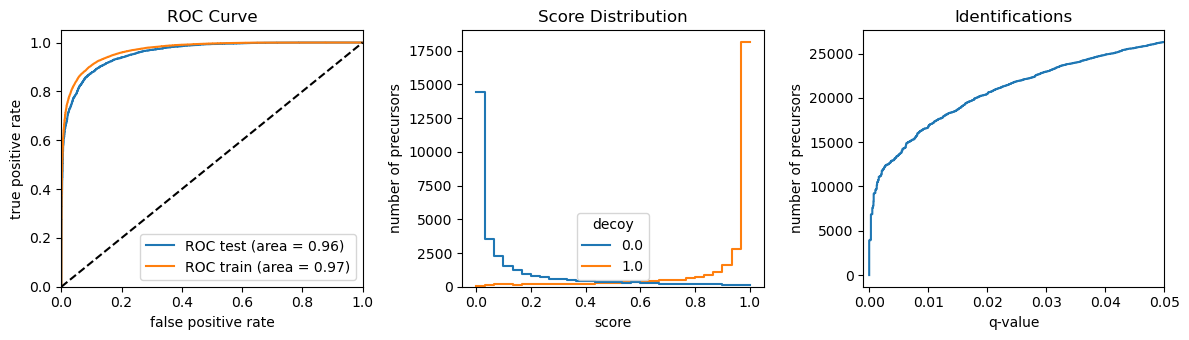

/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_56692/1868777735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['decoy'] = np.zeros(len(channel_df))


(64084, 77)
(64084,)


/var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/ipykernel_56692/1868777735.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['proba'] = pipeline.predict_proba(X)[:,1]


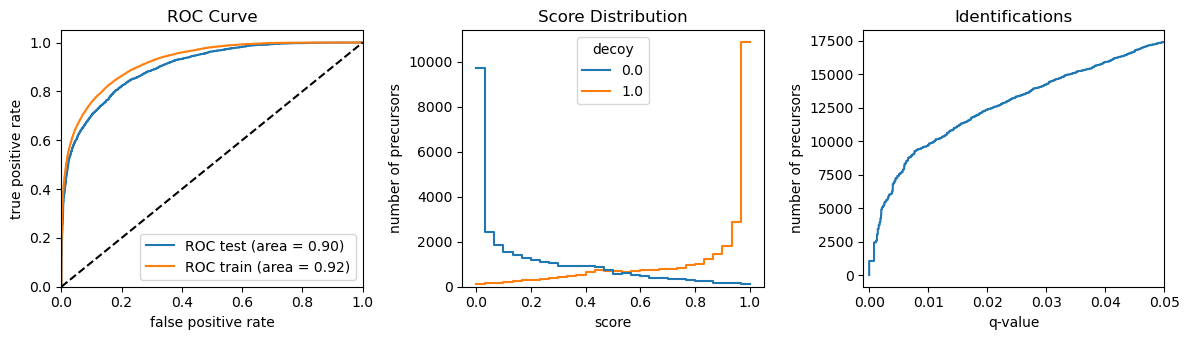

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier

from alphadia.library import fdr_to_q_values

output_dfs = []

for channel in [4,8]:
    channel_df = features_df[features_df['channel'].isin([channel, 12])]
    channel_df['decoy'] = np.zeros(len(channel_df))
    channel_df.loc[channel_df['channel'] == 12, 'decoy'] = 1
    channel_df = channel_df.dropna()

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('GBC',MLPClassifier(
            hidden_layer_sizes=(50, 25, 5), 
            max_iter=1000, 
            alpha=0.1, 
            learning_rate='adaptive', 
            learning_rate_init=0.001, 
            early_stopping=True, tol=1e-6
        ))
    ])

    X = channel_df[all_feature_columns].values
    y = channel_df['decoy'].values

    print(X.shape)
    print(y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pipeline.fit(X_train, y_train)
    

    y_test_proba = pipeline.predict_proba(X_test)[:,1]
    y_test_pred = np.round(y_test_proba)

    y_train_proba = pipeline.predict_proba(X_train)[:,1]
    y_train_pred = np.round(y_train_proba)

    channel_df['proba'] = pipeline.predict_proba(X)[:,1]
    # subset to the best candidate for every precursor
    channel_df = channel_df.sort_values(by=['proba'], ascending=True)
    features_best_df = channel_df


    # ROC curve
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    roc_auc_test = auc(fpr_test, tpr_test)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    
    
    # plotting

    fig, axs = plt.subplots(ncols=3, figsize=(12,3.5))

    axs[0].plot(fpr_test, tpr_test,label="ROC test (area = %0.2f)" % roc_auc_test)
    axs[0].plot(fpr_train, tpr_train,label="ROC train (area = %0.2f)" % roc_auc_train)

    axs[0].plot([0, 1], [0, 1], color="k", linestyle="--")
    axs[0].set_xlim([0.0, 1.0])
    axs[0].set_ylim([0.0, 1.05])
    axs[0].set_xlabel("false positive rate")
    axs[0].set_ylabel("true positive rate")
    axs[0].set_title("ROC Curve")
    axs[0].legend(loc="lower right")
    
    sns.histplot(data=features_best_df, x='proba', hue='decoy', bins=30, element="step", fill=False, ax=axs[1])
    axs[1].set_xlabel('score')
    axs[1].set_ylabel('number of precursors')
    axs[1].set_title("Score Distribution")

    features_best_df = features_best_df.sort_values(['proba'], ascending=True)
    target_values = 1-features_best_df['decoy'].values
    decoy_cumsum = np.cumsum(features_best_df['decoy'].values)
    target_cumsum = np.cumsum(target_values)
    fdr_values = decoy_cumsum/target_cumsum
    features_best_df['qval'] = fdr_to_q_values(fdr_values)
    q_val = features_best_df[features_best_df['qval'] <0.05 ]['qval'].values

    ids = np.arange(0, len(q_val), 1)
    axs[2].plot(q_val, ids)
    axs[2].set_xlim(-0.001, 0.05)
    axs[2].set_xlabel('q-value')
    axs[2].set_ylabel('number of precursors')
    axs[2].set_title("Identifications")
    
    fig.tight_layout()
    plt.show()

0:00:00.001797  PROGRESS:       _   _      _         ___ ___   _   
0:00:00.005549  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:00.012167  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:00.015897  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:00.019116  PROGRESS:            |_|                            
0:00:00.020251  PROGRESS: 
0:00:00.020867  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default_new.yaml
0:00:00.028687  INFO: Applying config update from dict
0:00:00.029636  PROGRESS: version: 1.1.0
0:00:00.030422  PROGRESS: hostname: PCMANN428.biochem.mpg.de
0:00:00.031146  PROGRESS: date: 2023-07-18 11:16:00
0:00:03.536564  INFO: renaming precursor_columns columns
0:00:03.537549  INFO: renaming fragment_columns columns
0:00:03.538174  INFO: ========= Library Stats =========
0:00:03.538399  INFO: Number of precursors: 220,333
0:00:03.569732  INFO: 	thereof targets:176,268
0:00:0

7862


  0%|          | 0/13958 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 13958/13958 [00:56<00:00, 246.03it/s] 
0:06:13.751620  WARNING: base_width_mobility has 16 NaNs ( 0.11 % out of 13958)
0:06:13.752321  WARNING: base_width_rt has 16 NaNs ( 0.11 % out of 13958)
0:06:13.752944  WARNING: rt_observed has 16 NaNs ( 0.11 % out of 13958)
0:06:13.753540  WARNING: mobility_observed has 16 NaNs ( 0.11 % out of 13958)
0:06:13.754194  WARNING: mono_ms1_intensity has 16 NaNs ( 0.11 % out of 13958)
0:06:13.754743  WARNING: top_ms1_intensity has 16 NaNs ( 0.11 % out of 13958)
0:06:13.755407  WARNING: sum_ms1_intensity has 16 NaNs ( 0.11 % out of 13958)
0:06:13.755940

(13939, 37)
(13939,)


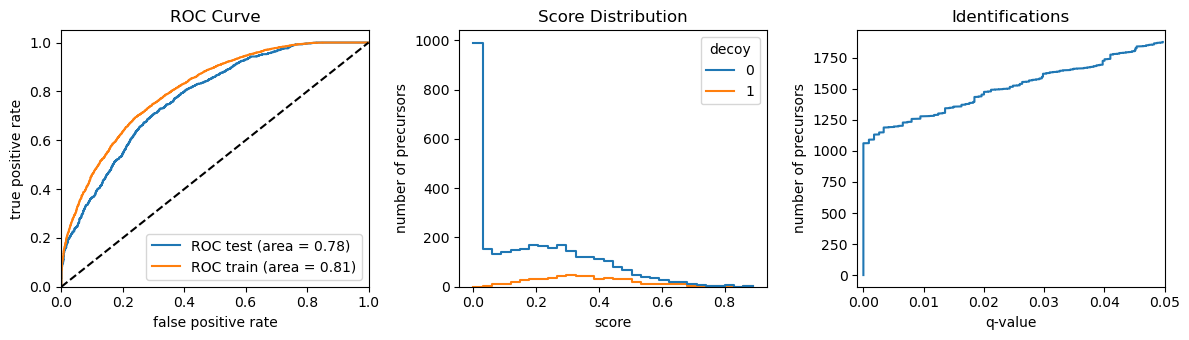

0:06:17.313825  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:06:17.314952  PROGRESS: Accumulated precursors: 3,926, 0.01 FDR: 1,280, 0.001 FDR: 1,092
0:06:17.316288  INFO: calibration group: precursor, fitting mz estimator 


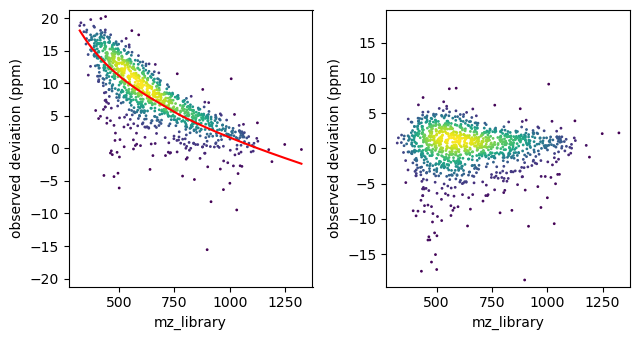

0:06:17.424191  INFO: calibration group: precursor, fitting rt estimator 


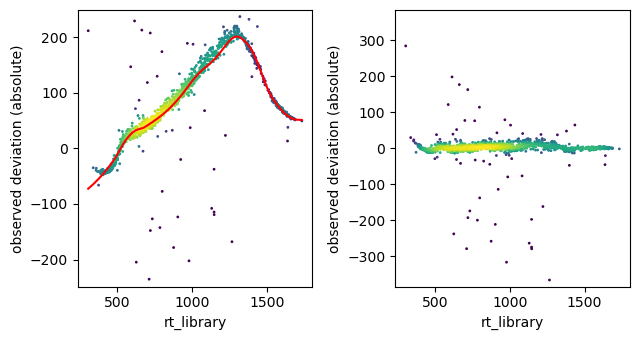

0:06:17.519580  INFO: calibration group: precursor, fitting mobility estimator 


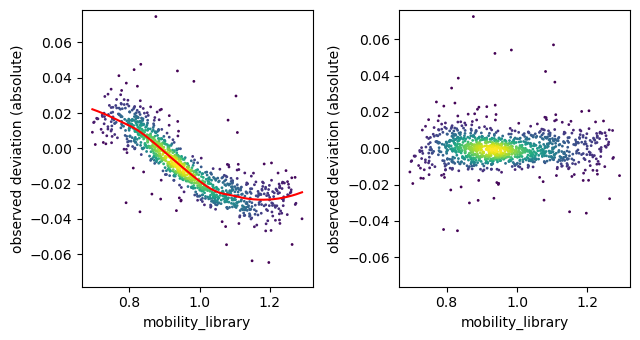

0:06:17.627400  INFO: calibration group: fragment, fitting mz estimator 


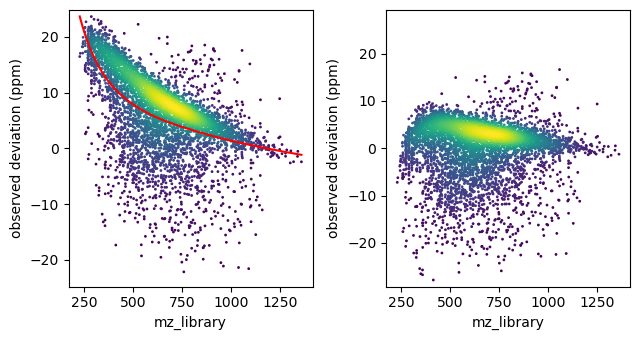

0:06:17.991739  INFO: calibration group: precursor, predicting mz
0:06:18.004585  INFO: calibration group: precursor, predicting rt
0:06:18.029200  INFO: calibration group: precursor, predicting mobility
0:06:18.038908  INFO: calibration group: fragment, predicting mz
0:06:18.328470  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:06:18.331620  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:06:18.333567  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:18.333996  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:18.334228  INFO: FWHM in RT is 4.24 seconds, sigma is 1.57
0:06:18.334539  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.03


7794


100%|██████████| 12915/12915 [00:03<00:00, 3846.38it/s]
0:06:31.900990  WARNING: base_width_mobility has 44 NaNs ( 0.34 % out of 12915)
0:06:31.901926  WARNING: base_width_rt has 44 NaNs ( 0.34 % out of 12915)
0:06:31.902520  WARNING: rt_observed has 44 NaNs ( 0.34 % out of 12915)
0:06:31.903026  WARNING: mobility_observed has 44 NaNs ( 0.34 % out of 12915)
0:06:31.903776  WARNING: mono_ms1_intensity has 44 NaNs ( 0.34 % out of 12915)
0:06:31.904540  WARNING: top_ms1_intensity has 44 NaNs ( 0.34 % out of 12915)
0:06:31.905165  WARNING: sum_ms1_intensity has 44 NaNs ( 0.34 % out of 12915)
0:06:31.905981  WARNING: weighted_ms1_intensity has 44 NaNs ( 0.34 % out of 12915)
0:06:31.906615  WARNING: weighted_mass_deviation has 44 NaNs ( 0.34 % out of 12915)
0:06:31.907083  WARNING: weighted_mass_error has 44 NaNs ( 0.34 % out of 12915)
0:06:31.907781  WARNING: mz_library has 44 NaNs ( 0.34 % out of 12915)
0:06:31.908376  WARNING: mz_observed has 44 NaNs ( 0.34 % out of 12915)
0:06:31.908983 

(12859, 37)
(12859,)


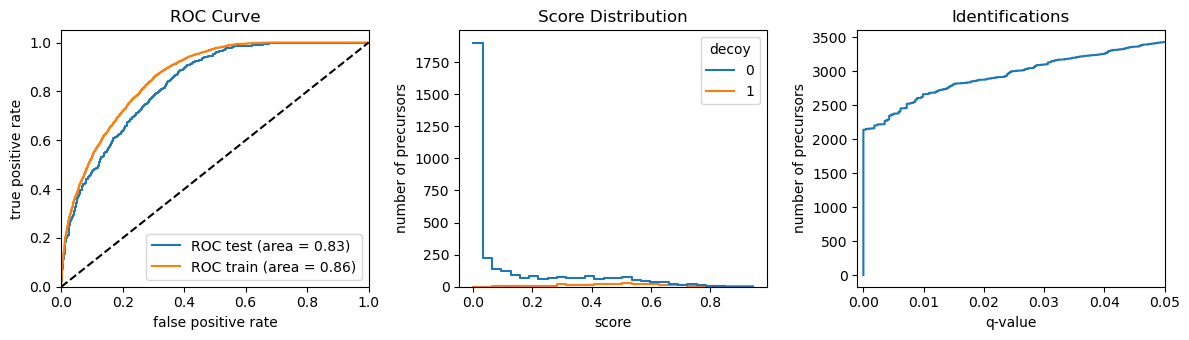

0:06:33.845117  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:06:33.845669  PROGRESS: Accumulated precursors: 3,885, 0.01 FDR: 2,659, 0.001 FDR: 2,153
0:06:33.847251  INFO: calibration group: precursor, fitting mz estimator 


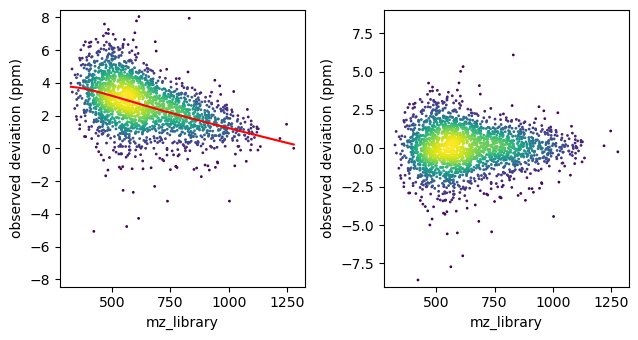

0:06:33.992720  INFO: calibration group: precursor, fitting rt estimator 


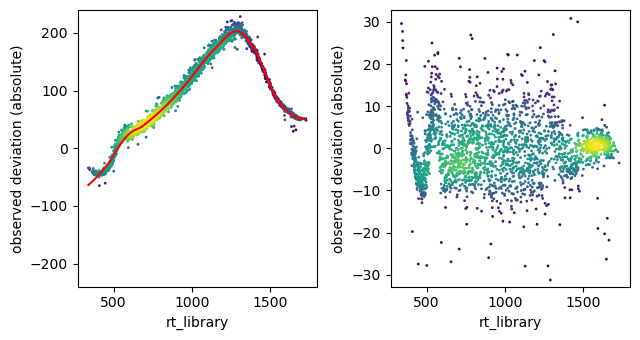

0:06:34.136004  INFO: calibration group: precursor, fitting mobility estimator 


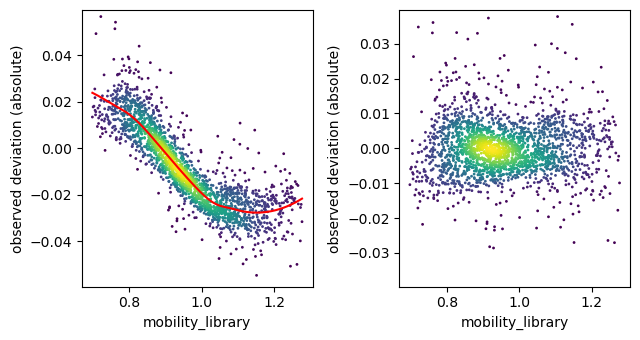

0:06:34.285973  INFO: calibration group: fragment, fitting mz estimator 


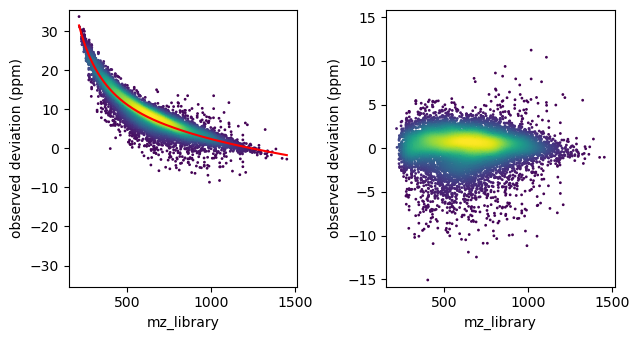

0:06:35.239068  INFO: calibration group: precursor, predicting mz
0:06:35.249104  INFO: calibration group: precursor, predicting rt
0:06:35.275620  INFO: calibration group: precursor, predicting mobility
0:06:35.285945  INFO: calibration group: fragment, predicting mz
0:06:35.576449  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:06:35.579596  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:06:35.581496  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:35.581873  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:35.582408  INFO: FWHM in RT is 3.69 seconds, sigma is 1.37
0:06:35.582733  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.73


7814


100%|██████████| 12432/12432 [00:03<00:00, 3871.19it/s]
0:06:49.018840  WARNING: base_width_mobility has 37 NaNs ( 0.30 % out of 12432)
0:06:49.019683  WARNING: base_width_rt has 37 NaNs ( 0.30 % out of 12432)
0:06:49.020664  WARNING: rt_observed has 37 NaNs ( 0.30 % out of 12432)
0:06:49.021364  WARNING: mobility_observed has 37 NaNs ( 0.30 % out of 12432)
0:06:49.021924  WARNING: mono_ms1_intensity has 37 NaNs ( 0.30 % out of 12432)
0:06:49.022495  WARNING: top_ms1_intensity has 37 NaNs ( 0.30 % out of 12432)
0:06:49.023158  WARNING: sum_ms1_intensity has 37 NaNs ( 0.30 % out of 12432)
0:06:49.023672  WARNING: weighted_ms1_intensity has 37 NaNs ( 0.30 % out of 12432)
0:06:49.024258  WARNING: weighted_mass_deviation has 37 NaNs ( 0.30 % out of 12432)
0:06:49.024757  WARNING: weighted_mass_error has 37 NaNs ( 0.30 % out of 12432)
0:06:49.025334  WARNING: mz_library has 37 NaNs ( 0.30 % out of 12432)
0:06:49.025870  WARNING: mz_observed has 37 NaNs ( 0.30 % out of 12432)
0:06:49.026761 

(12386, 37)
(12386,)


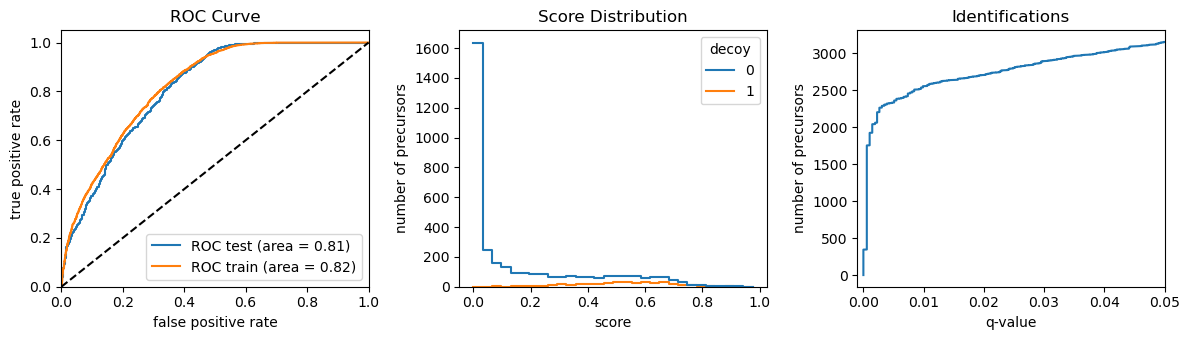

0:06:50.278984  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:06:50.279576  PROGRESS: Accumulated precursors: 3,900, 0.01 FDR: 2,555, 0.001 FDR: 1,754
0:06:50.281120  INFO: calibration group: precursor, fitting mz estimator 


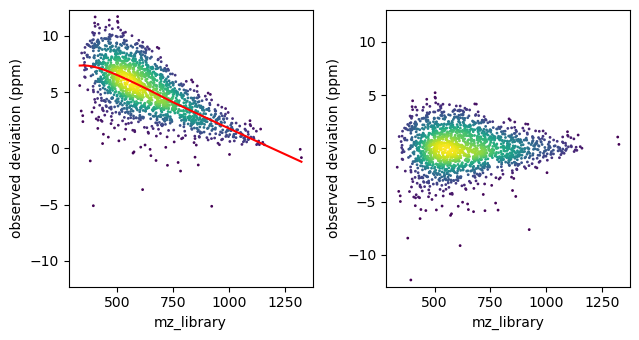

0:06:50.404736  INFO: calibration group: precursor, fitting rt estimator 


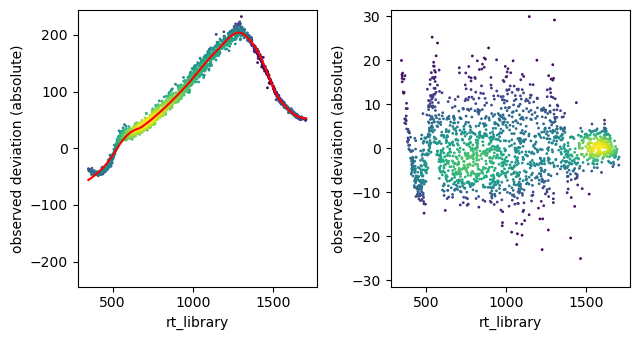

0:06:50.530610  INFO: calibration group: precursor, fitting mobility estimator 


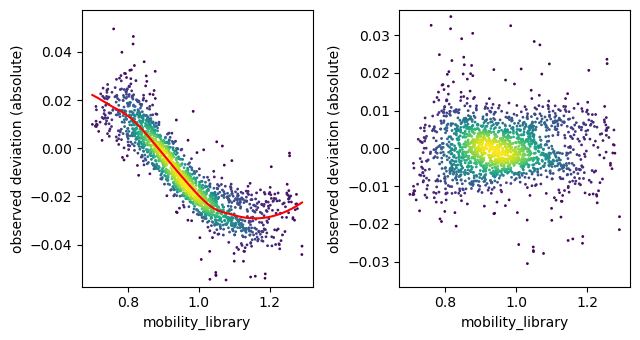

0:06:50.917366  INFO: calibration group: fragment, fitting mz estimator 


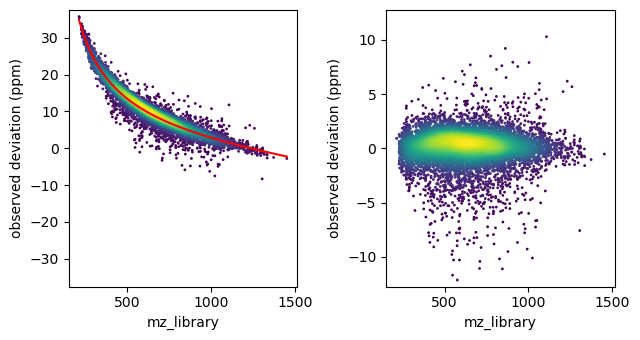

0:06:51.608053  INFO: calibration group: precursor, predicting mz
0:06:51.619713  INFO: calibration group: precursor, predicting rt
0:06:51.651732  INFO: calibration group: precursor, predicting mobility
0:06:51.662280  INFO: calibration group: fragment, predicting mz
0:06:51.954514  PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 4000 ===
0:06:51.957867  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:06:51.959704  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:06:51.960093  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:51.960369  INFO: FWHM in RT is 3.81 seconds, sigma is 1.41
0:06:51.960770  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.87


7836


100%|██████████| 12695/12695 [00:03<00:00, 3888.14it/s]
0:07:05.586336  WARNING: base_width_mobility has 36 NaNs ( 0.28 % out of 12695)
0:07:05.586975  WARNING: base_width_rt has 36 NaNs ( 0.28 % out of 12695)
0:07:05.587666  WARNING: rt_observed has 36 NaNs ( 0.28 % out of 12695)
0:07:05.588433  WARNING: mobility_observed has 36 NaNs ( 0.28 % out of 12695)
0:07:05.588871  WARNING: mono_ms1_intensity has 36 NaNs ( 0.28 % out of 12695)
0:07:05.589477  WARNING: top_ms1_intensity has 36 NaNs ( 0.28 % out of 12695)
0:07:05.590236  WARNING: sum_ms1_intensity has 36 NaNs ( 0.28 % out of 12695)
0:07:05.590809  WARNING: weighted_ms1_intensity has 36 NaNs ( 0.28 % out of 12695)
0:07:05.591472  WARNING: weighted_mass_deviation has 36 NaNs ( 0.28 % out of 12695)
0:07:05.592042  WARNING: weighted_mass_error has 36 NaNs ( 0.28 % out of 12695)
0:07:05.592483  WARNING: mz_library has 36 NaNs ( 0.28 % out of 12695)
0:07:05.592877  WARNING: mz_observed has 36 NaNs ( 0.28 % out of 12695)
0:07:05.593659 

(12655, 37)
(12655,)


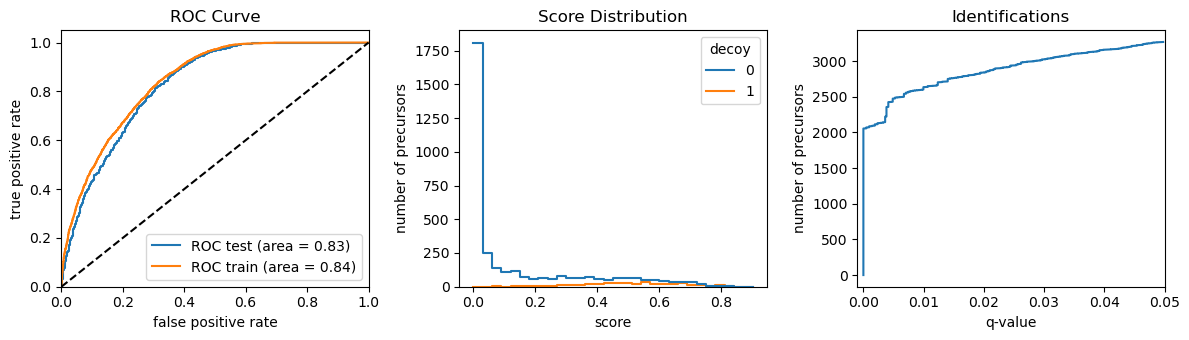

0:07:07.132065  PROGRESS: === checking if recalibration conditions were reached, target 800 precursors ===
0:07:07.132596  PROGRESS: Accumulated precursors: 3,909, 0.01 FDR: 2,636, 0.001 FDR: 2,087
0:07:07.134390  INFO: calibration group: precursor, fitting mz estimator 


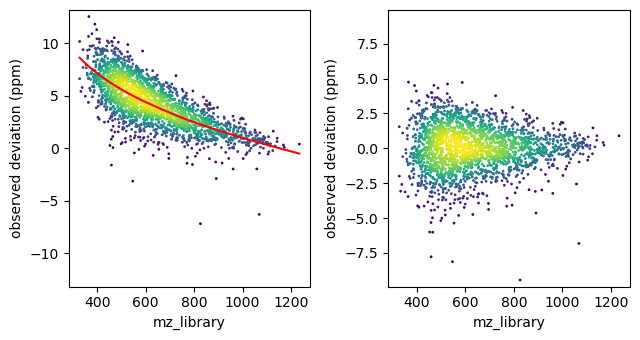

0:07:07.282345  INFO: calibration group: precursor, fitting rt estimator 


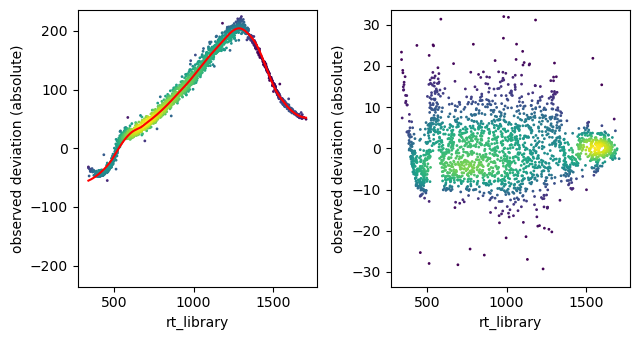

0:07:07.421915  INFO: calibration group: precursor, fitting mobility estimator 


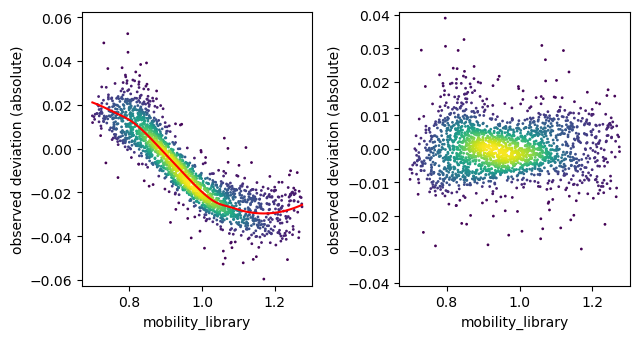

0:07:07.578772  INFO: calibration group: fragment, fitting mz estimator 


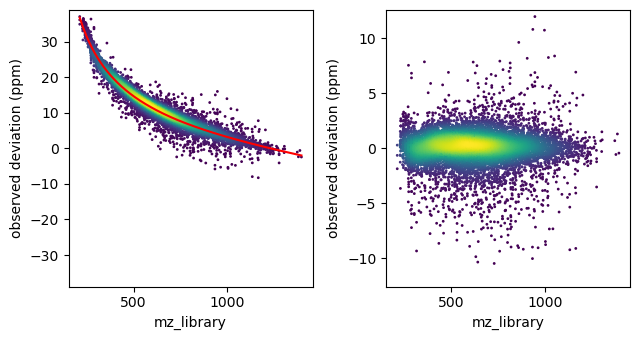

0:07:08.471001  INFO: calibration group: precursor, predicting mz
0:07:08.480793  INFO: calibration group: precursor, predicting rt
0:07:08.505083  INFO: calibration group: precursor, predicting mobility
0:07:08.524013  INFO: calibration group: fragment, predicting mz
0:07:08.824243  PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 4000 ===
0:07:08.827377  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:07:08.831088  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:07:08.831475  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:07:08.832101  INFO: FWHM in RT is 3.77 seconds, sigma is 1.39
0:07:08.832457  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.77


7852


100%|██████████| 12675/12675 [00:03<00:00, 3849.75it/s]
0:07:22.895018  WARNING: base_width_mobility has 46 NaNs ( 0.36 % out of 12675)
0:07:22.895714  WARNING: base_width_rt has 46 NaNs ( 0.36 % out of 12675)
0:07:22.896282  WARNING: rt_observed has 46 NaNs ( 0.36 % out of 12675)
0:07:22.896993  WARNING: mobility_observed has 46 NaNs ( 0.36 % out of 12675)
0:07:22.897686  WARNING: mono_ms1_intensity has 46 NaNs ( 0.36 % out of 12675)
0:07:22.898107  WARNING: top_ms1_intensity has 46 NaNs ( 0.36 % out of 12675)
0:07:22.898840  WARNING: sum_ms1_intensity has 46 NaNs ( 0.36 % out of 12675)
0:07:22.899410  WARNING: weighted_ms1_intensity has 46 NaNs ( 0.36 % out of 12675)
0:07:22.900092  WARNING: weighted_mass_deviation has 46 NaNs ( 0.36 % out of 12675)
0:07:22.900735  WARNING: weighted_mass_error has 46 NaNs ( 0.36 % out of 12675)
0:07:22.901175  WARNING: mz_library has 46 NaNs ( 0.36 % out of 12675)
0:07:22.901830  WARNING: mz_observed has 46 NaNs ( 0.36 % out of 12675)
0:07:22.902373 

(12621, 37)
(12621,)


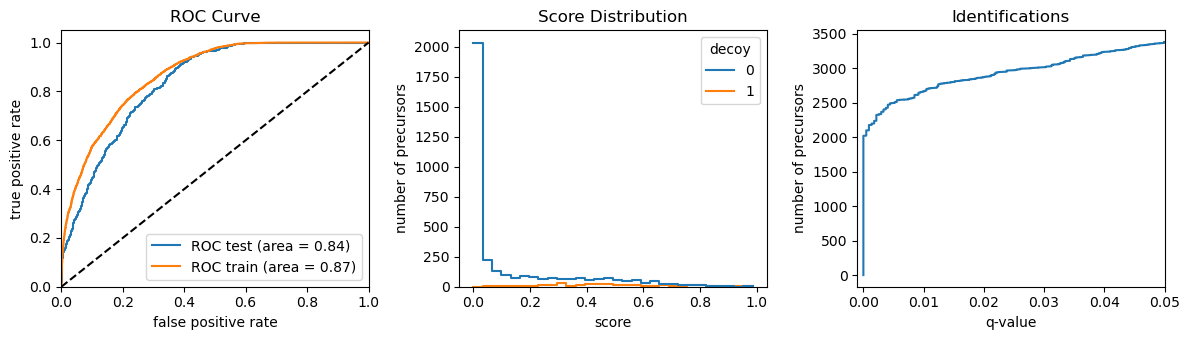

0:07:25.241804  PROGRESS: === checking if recalibration conditions were reached, target 1000 precursors ===
0:07:25.242201  PROGRESS: Accumulated precursors: 3,910, 0.01 FDR: 2,666, 0.001 FDR: 2,178
0:07:25.243758  INFO: calibration group: precursor, fitting mz estimator 


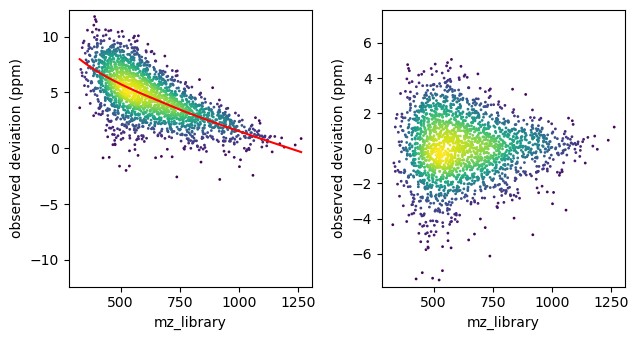

0:07:25.386125  INFO: calibration group: precursor, fitting rt estimator 


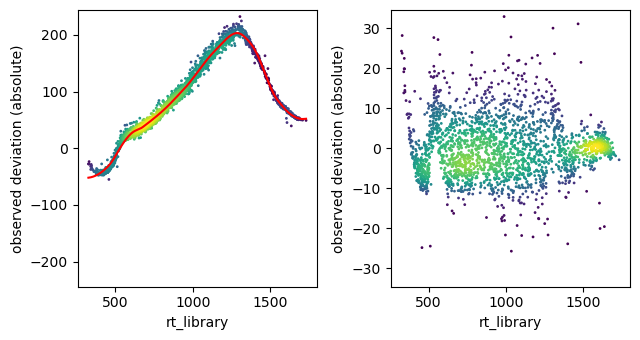

0:07:25.529825  INFO: calibration group: precursor, fitting mobility estimator 


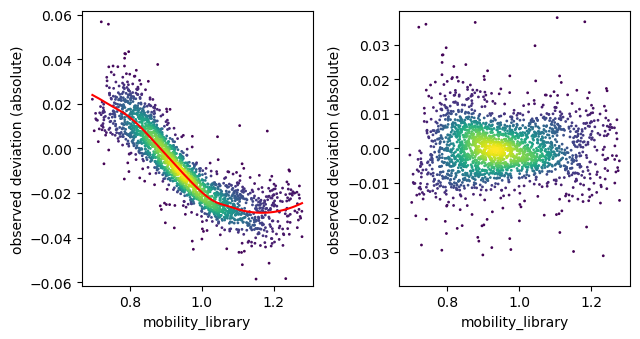

0:07:25.714439  INFO: calibration group: fragment, fitting mz estimator 


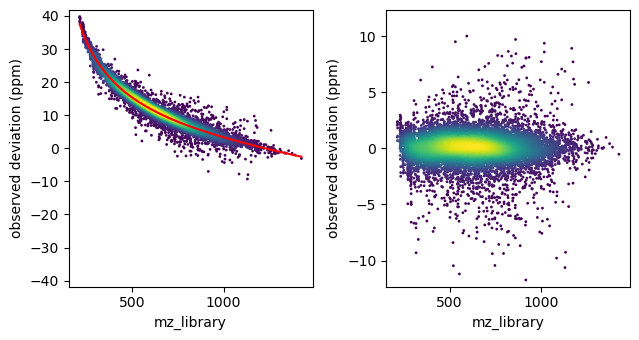

0:07:26.654659  INFO: calibration group: precursor, predicting mz
0:07:26.668707  INFO: calibration group: precursor, predicting rt
0:07:26.723508  INFO: calibration group: precursor, predicting mobility
0:07:26.737679  INFO: calibration group: fragment, predicting mz
0:07:27.041703  INFO: calibration group: precursor, predicting mz
0:07:27.052744  INFO: calibration group: precursor, predicting rt
0:07:27.077994  INFO: calibration group: precursor, predicting mobility
0:07:27.090229  INFO: calibration group: fragment, predicting mz
0:07:27.409453  INFO: calibration group: precursor, predicting mz
0:07:27.419193  INFO: calibration group: precursor, predicting rt
0:07:27.448201  INFO: calibration group: precursor, predicting mobility
0:07:27.457815  INFO: calibration group: fragment, predicting mz
0:07:27.739844  PROGRESS: MS1 error: 15, MS2 error: 15, RT error: 30, Mobility error: 0.04
0:07:27.753038  INFO: Duty cycle consists of 5 frames, 0.57 seconds cycle time
0:07:27.753573  INFO: D

88132


100%|██████████| 297240/297240 [01:18<00:00, 3801.66it/s]
0:10:39.835403  WARNING: base_width_mobility has 840 NaNs ( 0.28 % out of 297240)
0:10:39.837445  WARNING: base_width_rt has 840 NaNs ( 0.28 % out of 297240)
0:10:39.838469  WARNING: rt_observed has 840 NaNs ( 0.28 % out of 297240)
0:10:39.839468  WARNING: mobility_observed has 840 NaNs ( 0.28 % out of 297240)
0:10:39.840440  WARNING: mono_ms1_intensity has 840 NaNs ( 0.28 % out of 297240)
0:10:39.841417  WARNING: top_ms1_intensity has 840 NaNs ( 0.28 % out of 297240)
0:10:39.842348  WARNING: sum_ms1_intensity has 840 NaNs ( 0.28 % out of 297240)
0:10:39.843284  WARNING: weighted_ms1_intensity has 840 NaNs ( 0.28 % out of 297240)
0:10:39.844322  WARNING: weighted_mass_deviation has 840 NaNs ( 0.28 % out of 297240)
0:10:39.845410  WARNING: weighted_mass_error has 840 NaNs ( 0.28 % out of 297240)
0:10:39.846308  WARNING: mz_library has 840 NaNs ( 0.28 % out of 297240)
0:10:39.847360  WARNING: mz_observed has 840 NaNs ( 0.28 % out 

(296199, 37)
(296199,)


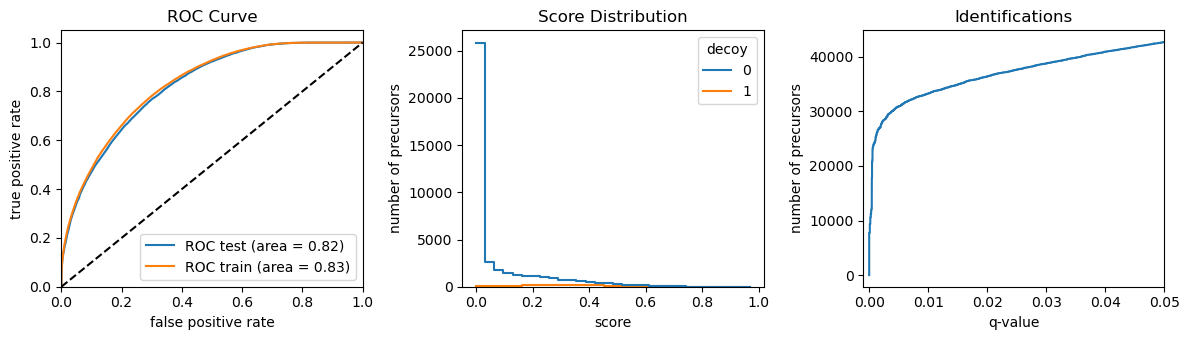

0:11:41.747864  PROGRESS: === extraction finished, 0.05 FDR: 40,682, 0.01 FDR: 32,946, 0.001 FDR: 24,516 ===
0:11:42.640013  INFO: calibration group: precursor, predicting mz
0:11:42.661299  INFO: calibration group: precursor, predicting rt
0:11:42.717631  INFO: calibration group: precursor, predicting mobility
0:11:42.743266  INFO: calibration group: fragment, predicting mz


AttributeError: module 'alphadia.extraction.validate' has no attribute 'candidates'

In [5]:


from alphadia.extraction import utils, plexscoring, quadrupole
import alphatims.utils
from tqdm import tqdm
import numba as nb

multiplex = plexscoring.Multiplexer(precursors_flat, fragments_flat, d0_df.copy())
candidates_df = multiplex()
candidates_df['rank'] = np.zeros(len(candidates_df), dtype = np.int64)
candidates_df = utils.calculate_score_groups(candidates_df, group_channels=True)

score_group_container = plexscoring.ScoreGroupContainer()
score_group_container.build_from_df(
    candidates_df['elution_group_idx'].values.astype(np.uint32),
    candidates_df['score_group_idx'].values.astype(np.uint32),
    candidates_df['precursor_idx'].values.astype(np.uint32),
    candidates_df['channel'].values.astype(np.uint8),
    candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
    candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

    candidates_df['scan_start'].values,
    candidates_df['scan_stop'].values,
    candidates_df['scan_center'].values,
    candidates_df['frame_start'].values,
    candidates_df['frame_stop'].values,
    candidates_df['frame_center'].values,

    candidates_df['charge'].values,
    candidates_df['mz_calibrated'].values.astype(np.float32),
    candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
)

q = quadrupole.SimpleQuadrupole(dia_data.cycle)
fragment_container = plexscoring.assemble_fragments(fragments_flat)

config = plexscoring.CandidateConfig()
config.max_cardinality = 1
config.score_grouped = True

alphatims.utils.set_threads(10)

plexscoring._executor(
    range(len(score_group_container)), 
    score_group_container,
    fragment_container,
    dia_data,
    config.jitclass(),
    q.jit,
    False
)

dict_list = []
precursor_idx_list = []
channel_list = []


for elem in tqdm(score_group_container):
    for i, candidate in enumerate(elem.candidates):
        if (len(candidate.features) > 0) and (candidate.channel != 0):
            
            precursor_idx_list.append(candidate.precursor_idx)
            dict_list.append(candidate.features)
            channel_list.append(candidate.channel)

df = pd.DataFrame(dict_list)
df['precursor_idx'] = precursor_idx_list
df['channel'] = channel_list

df = df.merge(
    precursors_flat[['precursor_idx', 'decoy', 'proteins',]],
    on='precursor_idx',
    how='left'
)

features_df = df[set(df.columns) - set(['top3_reference_template_frame_cosine','top3_reference_template_scan_cosine', 'top3_y_ion_correlation','top3_b_ion_correlation'])].copy()
all_feature_columns = list(set(features_df.columns) - set(['channel', 'precursor_idx','decoy','proteins']))



    print(len(features_best_df[features_best_df['qval'] <=0.01 ]['qval']))
    print(features_best_df[features_best_df['qval'] <=0.01 ]['proteins'].nunique())


    output_dfs.append(features_best_df[features_best_df['qval'] <=0.01])

del dia_data

stop_time = time.time()
duration = stop_time - start_time

duration_df = pd.DataFrame({'raw_name': [raw_name], 'duration': [duration]})
duration_df.to_csv(os.path.join(output_location, f'{raw_name}_duration.tsv'), sep = '\t', index = False)

output_dfs = pd.concat(output_dfs)
output_dfs.to_csv(os.path.join(output_location, f'{raw_name}_d4_d8.tsv'), sep = '\t', index = False)


In [ ]:
class Workflow:
    def __init__(
            self,
            output_folder,
            config, 
            dia_data,
            precursors_flat, 
            fragments_flat,
            figure_path = None,
            neptune_token = None,
            neptune_tags=[]
        ):
        self.output_folder = output_folder
        self.config = config
        self.dia_data = dia_data

    def set_library(self, precursors_flat, fragments_flat):

    def calibration():
        pass
    
    def extraction(
            self,
            psm_df = None,
            output_channels = [4,8],
            scoring = 
            
            
    ):
        pass